<span style="font-size:42px"><b>Practise Case 02</b></span><br><br>
<span style="font-size:36px">Exploratory Data Analysis Bank Marketing Dataset</span>

Copyright 2019 Gunawan Lumban Gaol

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language overning permissions and limitations under the License.

# Import Packages

In [6]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from edapy.edapy import transformation
from edapy.edapy import plotting

# Import Data

The data is collected from a marketing **campaign of a banking institution.** The marketing campaigns were done **on phone calls.** Often, **more than one contact to the same client was required,** in order to access if the product (bank term deposit) would be **('yes')** or not **('no')** subscribed. A Portuguese retail bank was addressed, with data collected from May 2008 to November 2010.

<span style="font-size:24px"><b>Input variables:</b></span><br><br>

<span style="font-size:16px"><b>Bank Client Data</b></span>
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

<span style="font-size:16px"><b>Related with the last contact of the current campaign</b></span>
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<span style="font-size:16px"><b>Other attributes</b></span>
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

<span style="font-size:16px"><b>Social and economic context attributes</b></span>
16. emp.var.rate: employment variation rate quarterly indicator (numeric)
17. cons.price.idx: consumer price index monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate daily indicator (numeric)
20. nr.employed: number of employees quarterly indicator (numeric)

<span style="font-size:24px"><b>Output variable (desired target)</b></span>
21. y has the client subscribed a term deposit? (binary: 'yes','no')

<hr>
Link original database: 

https://archive.ics.uci.edu/ml/datasets/bank+marketing

Date Donated: 2012-02-14

Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [8]:
data = pd.read_csv('csv/bank-marketing-full.csv', sep=';')

In [9]:
data.shape

(41188, 21)

# Data Preprocessing

* Check missing & null data, remove them if necessary
* Check infinite values data, remove or convert to null if necessary
* Check duplicated data, remove them if necessary
* Split numerical and categorical column

## Missing & Null Data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

No missing data, continue.

## Infinite Values Data

In [11]:
data = data.replace([np.inf, -np.inf], np.nan)

## Duplicated Data

In [12]:
data.duplicated(subset=list(set(data.columns) - set('y'))).sum()

12

There exists duplicated data, but since there is **no unique identifier within the data (e.g ID column or name)** and the **number of duplicated data is small**, we can proceed without deleting the duplicated data, assuming there maybe a same person with all same characteristics based on attributes in the data.

## Split Numerical & Categorical Data

* Set `col_ID` and `col_target`, depending on the dtype of these column, create numerical & categorical column list.

In [13]:
col_ID = ''
col_target = 'y'

In [15]:
transformation.convert_to_categorical(data)

Column job casted to categorical
Column marital casted to categorical
Column education casted to categorical
Column default casted to categorical
Column housing casted to categorical
Column loan casted to categorical
Column contact casted to categorical
Column month casted to categorical
Column day_of_week casted to categorical
Column previous casted to categorical
Column poutcome casted to categorical
Column emp.var.rate casted to categorical
Column nr.employed casted to categorical
Column y casted to categorical


In [16]:
cols_num = list(set(data.select_dtypes(include=[np.number]).columns) - set([col_ID]))
cols_cat = list(set(data.select_dtypes(exclude=[np.number]).columns) - set([col_target]))

# Data Understanding

* Distribution of target column
* For each combination of data
    * Plot distribution of numerical column, grouped by target column
    * Plot mode (distribution) of categorical column, grouped by target column
* Analyze business questions related to the data   

## Univariate (Attribute - Target) Analysis

### Target Column

In [17]:
print(data[col_target].value_counts())
print(data[col_target].value_counts(normalize=True))

no     36548
yes     4640
Name: y, dtype: int64
no     0.887346
yes    0.112654
Name: y, dtype: float64


Our target is imbalanced, we may do `undersampling` or `oversampling` technique later, for model that require equal distribution of target value.

Or we can use the `weighting` for those model.

### Numerical Columns

In [18]:
data[cols_num].describe()

,cons.conf.idx,pdays,cons.price.idx,duration,age,campaign,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000
mean,-40.502600,962.475454,93.575664,258.285010,40.02406,2.567593,3.621291
std,4.628198,186.910907,0.578840,259.279249,10.42125,2.770014,1.734447
min,-50.800000,0.000000,92.201000,0.000000,17.00000,1.000000,0.634000
25%,-42.700000,999.000000,93.075000,102.000000,32.00000,1.000000,1.344000
50%,-41.800000,999.000000,93.749000,180.000000,38.00000,2.000000,4.857000
75%,-36.400000,999.000000,93.994000,319.000000,47.00000,3.000000,4.961000
max,-26.900000,999.000000,94.767000,4918.000000,98.00000,56.000000,5.045000


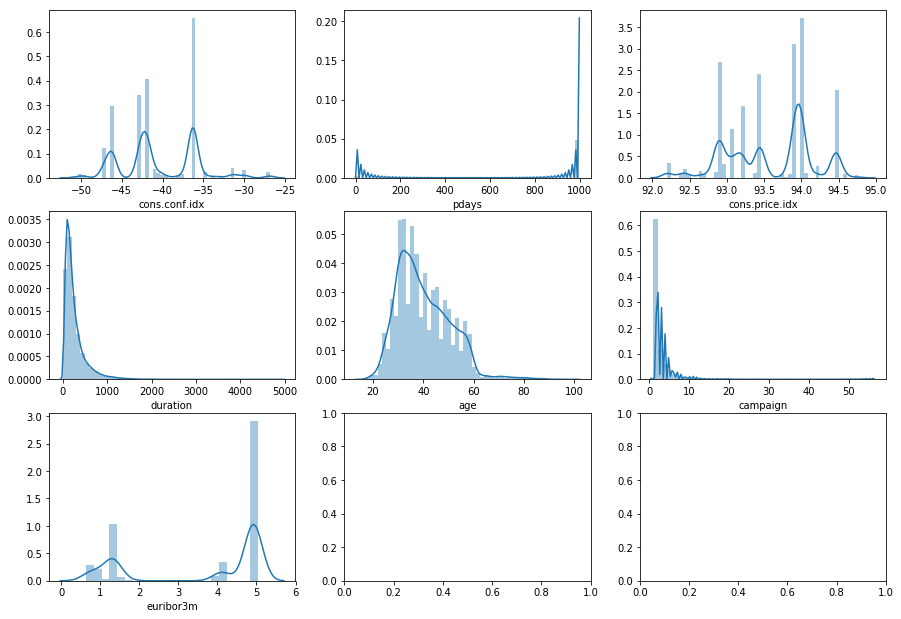

In [20]:
plotting.distplot_numerical(data, cols_num)

**Conclusion**

* There exists zero values in `duration` attributes. This can mean that the calls isn't answered, or the client hasn't been contacted. Using the former assumption, we can directly know if the client will purchase the product or not, solely on this attribute. If we want to deploy realistic modelling, we need to drop this attribute.
* Two peak distribution in `euribor3m` attributes, indicating that no year in this data that has around 3% values. Indicating a certain drop/raise of `euribor3m` between any year.
* Variables that can be casted as categorical: `cons.conf.idx` and `cons.price.idx`, as those attributes has less than 30 values.
* There exists 999 values in `pdays` attribute, indicating if the client hasn't been contacted on previous campaign. Need to remove these values to see clearer distribution.
* More than 90% of values are less than 3 in `campaign` attributes, consider binning.
* Most of our customer are middle ages, with maximum of 98 years and mean of 38 years old. 

In [21]:
data.loc[data['pdays'] == 999, 'pdays'] = np.nan

### Categorical Columns

In [22]:
data[cols_cat].describe()

,housing,default,loan,emp.var.rate,nr.employed,poutcome,job,month,contact,day_of_week,previous,education,marital
count,41188,41188,41188,41188.0,41188.0,41188,41188,41188,41188,41188,41188,41188,41188
unique,3,3,3,10.0,11.0,3,12,10,2,5,8,8,4
top,yes,no,no,1.4,5228.1,nonexistent,admin.,may,cellular,thu,0,university.degree,married
freq,21576,32588,33950,16234.0,16234.0,35563,10422,13769,26144,8623,35563,12168,24928


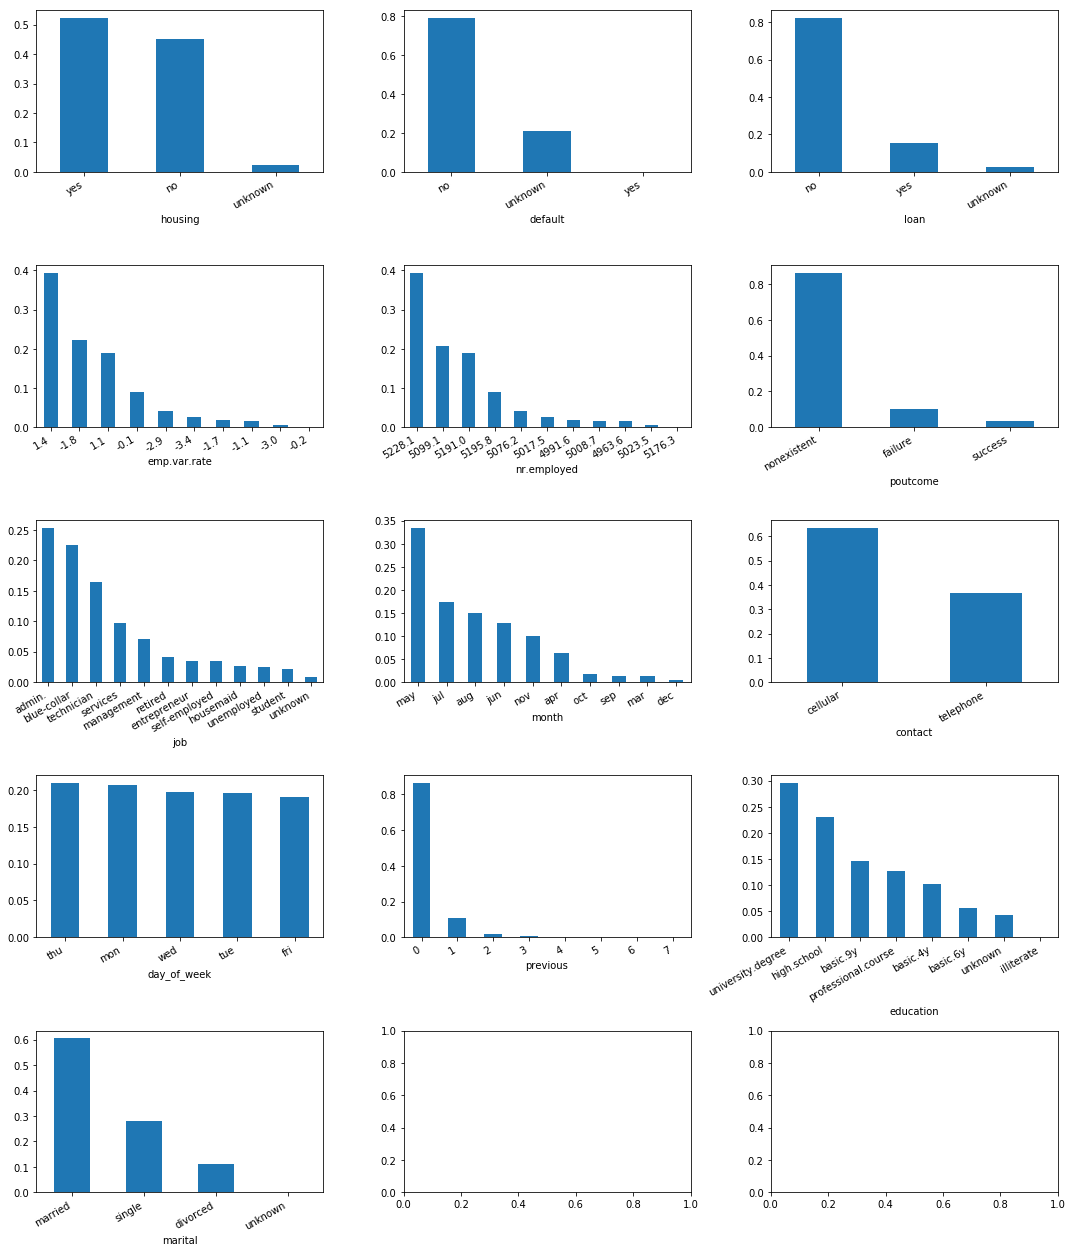

In [24]:
plotting.distplot_categorical(data, cols_cat)

**Conclusion**
* **80%** of our customer has no loan
* Top 3 jobs (more than 50% share) are **'admin.', 'blue-collar', 'technician'**
* Almost **equal distribution in `housing` attribute**
* More than 80% of our client hasn't been in previous campaign, out of those who did, **almost twice the distribution of 'failure' than 'success'.**
* Surprisingly, although most of our customer job is 'admin.', 'blue-collar', or 'technician', **top 3 distribution of `education` is 'university_degree', 'high_school', and 'basic_9y'.**
* **More than 80% of our client hasn't been in previous campaign**, out of those who did, **most has only been once or twice in previous campaigns.**
* If we divide `emp.var.rate` between negative and positive, we see that **more than 80% of our customer has negative `emp.var.rate`**
* 60% of our customers are contacted via 'cellular'
* Equal distribution of marketing did on each weekdays, **no marketing campaign during weekend.**
* **More than 60% of our customers are 'married'**
* Attributes with unknown values: `loan`, `housing`, `default`, `marital`. Note that if we remove 'unknown' in `default` column, then `default` attributes would only has 1 distinct values, as share of 'yes' value is very small. Need to explore further on this `default` attributes.

## Bivariate (Attribute - Target) Analysis

### Numerical Columns

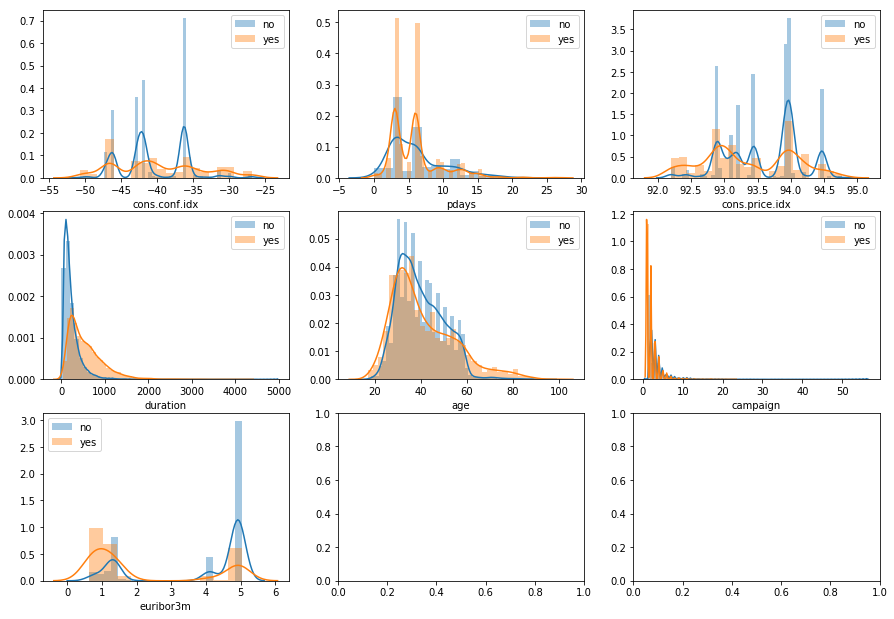

In [25]:
plotting.distplot_numerical(data, cols_num, col_target)

**Conclusion**
* Duration: strong potential predictor, can't be used as we don't know the yet how the customer respond before the call, removed.
* Campaign: strong potential predictor, fresh customer in campaign have more probability of anwering `yes` in the respond, we can, if we want to do some prioritization on the call list of our campaign.
* euribor3m: [definition](https://id.wikipedia.org/wiki/Euro_Interbank_Offered_Rate), lower rate means more demand, so more customer will answer `yes` when euribor values around ~1%, and more customer will answer `no` when the rate is higher, typically around ~5%, with center value of equal probabilities between `yes` and `no` at around ~3%.
* cons.conf.idx: In simple terms, increased consumer confidence indicates economic growth in which consumers are spending money, indicating higher consumption. Decreasing consumer confidence implies slowing economic growth, and so consumers are likely to decrease their spending. Customer will more likely to respond `no` with higher value of cons.conf.idx.
* pdays: no significant differences between customers who respond `no` and `yes`.
* cons.price.idx: The CPI measures the average change in prices over time that consumers pay for a basket of goods and services, commonly known as inflation. Essentially it attempts to quantify the aggregate price level in an economy and thus measure the purchasing power of a country's unit of currency. The weighted average of the prices of goods and services that approximates an individual's consumption patterns is used to calculate CPI. This make sense as higher index will lower the demand of our customer, so more customer will likely respond `no` when this index values is relatively high.
* age: older customer (more than 60) is more likely to respond to `yes` than `no`, this attributes will require more explanation in further analysis.

### Categorical Columns

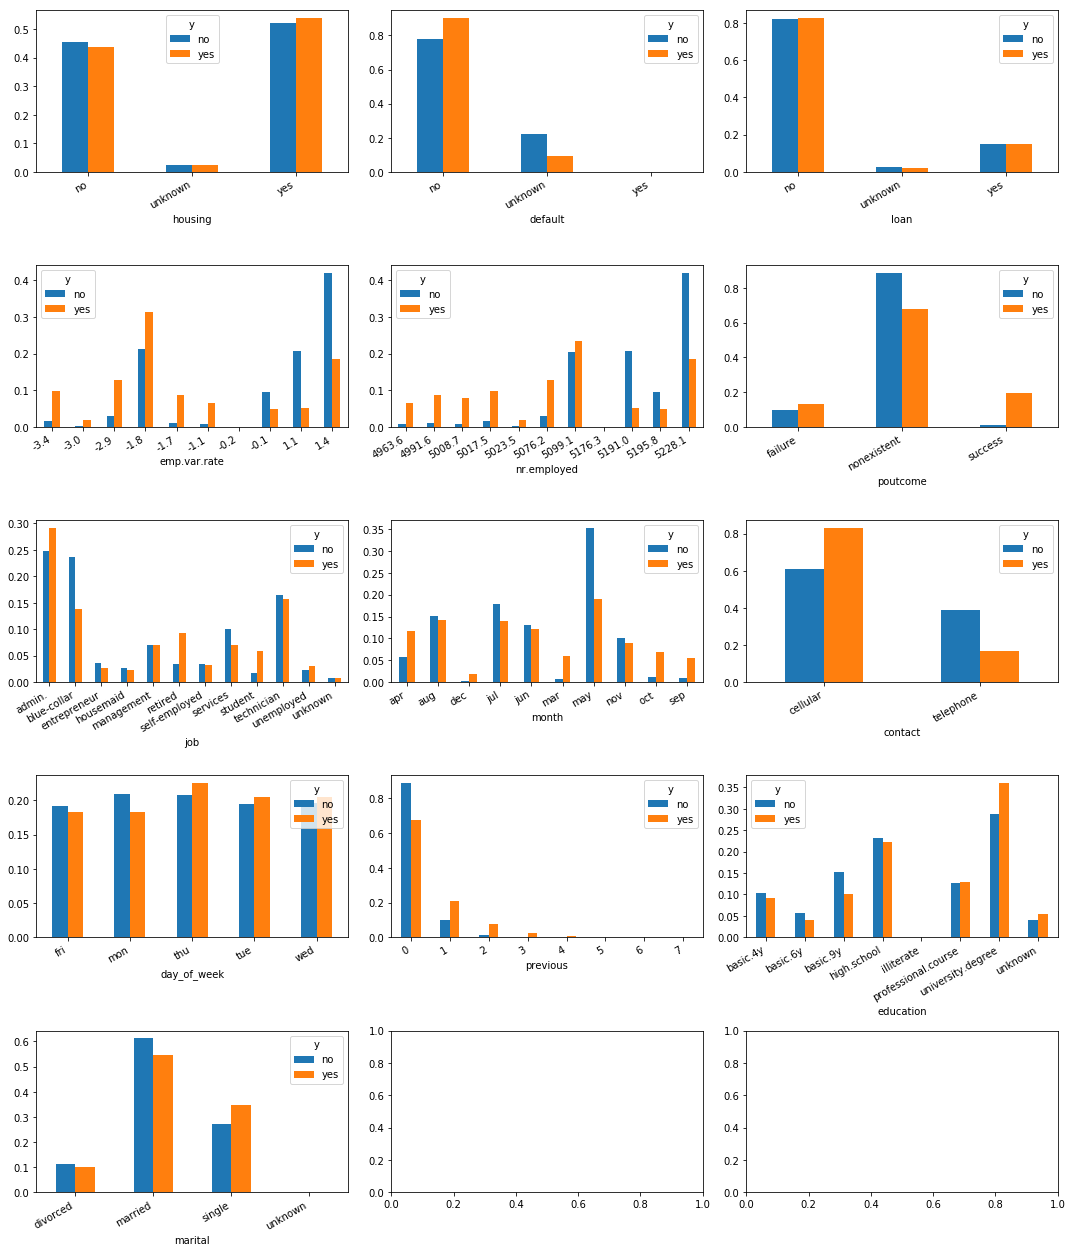

In [26]:
plotting.distplot_categorical(data, cols_cat, col_target)

**Conclusion**

* From `job`, we see (in distribution) more customer who are 'blue-collar' respond with 'no' compared to 'yes'
* From `nr.employed`, we see more 'no' respond the higher the value of `nr.employed` is. This trend is also seen on `emp.var.rate` column.
* There exists a moderate value of missing data as 'unknown' value (around ~20%) in `default` column. And also only very small share in 'yes' value in `default` column. Since this is roughly the same as single level value in this column, the suggestion is to remove this attribute.

### Numerical Columns Further Analysis

Further Analysis of:
* pdays, removal of 999 values, create `pdays_999_bin` 
    * 1 - pdays == 999
    * 0 - pdays != 999
* age, binning old age, create `age_old_bin` 
    * 1 - age >= 60
    * 0 - age < 60

In [27]:
# Remove 999 values from pdays
data['pdays_999_bin'] = ['non_contacted' if x == True else 'contacted' for x in data['pdays'].isnull()]

# Binary age column
data['age_old_bin'] = ['age>=60' if x >= 60 else 'age<60' for x in data['age']]

#### `pdays` attribute

* want to see the distribution of numerical column for `non_contacted` and `contacted` client.
* want to see the distribution of categorical column for `non_contacted` and `contacted` client.

##### Non Contacted Customers vs Contacted Customers

In [28]:
print(data['pdays_999_bin'].value_counts(normalize=True))
print(data['pdays_999_bin'].value_counts(normalize=False))

non_contacted    0.963217
contacted        0.036783
Name: pdays_999_bin, dtype: float64
non_contacted    39673
contacted         1515
Name: pdays_999_bin, dtype: int64


We see that **96.32%** of our customer during this current campaign were non_contacted customer. There may exists prioritization on marketing targeting non_contacted customers.

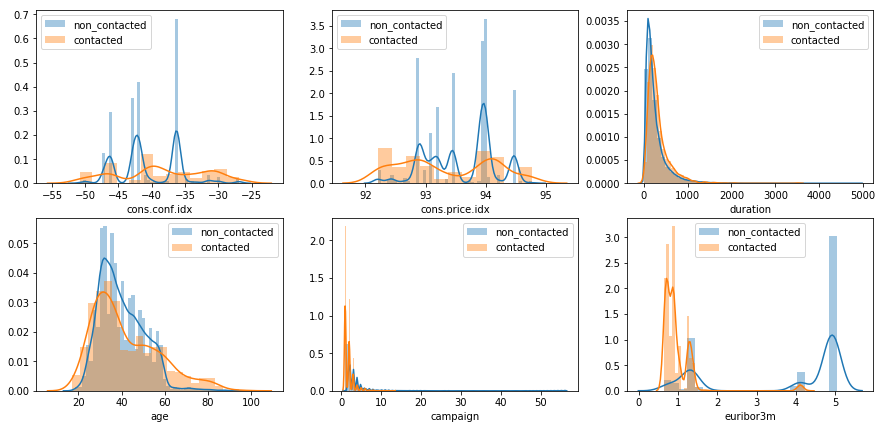

In [29]:
plotting.distplot_numerical(data, list(set(cols_num) - set(['pdays'])), 'pdays_999_bin')

**Conclusion**
* We can clearly see that non_contacted get more contact during the campaign, reaching up to 50 numbers of contact made, compared to previously contacted customer, with less than 14 numbers of contact made. This may suggest a prioritization on the call list made by the bank.
* On euribor3m, we can see a rather anomaly as non_contacted customer are the one with high euribor3m values. By seeing from https://www.euribor-rates.eu/, we can see that high euribor3m values of more than 2.5% (2008 - 2010) are only in 2008. This indicates that a lot of non_contacted customers are in 2008 data. This make sense, as when euribor3m is high, the bank probably didn't contact as much customer as we are during low euribor3m values.

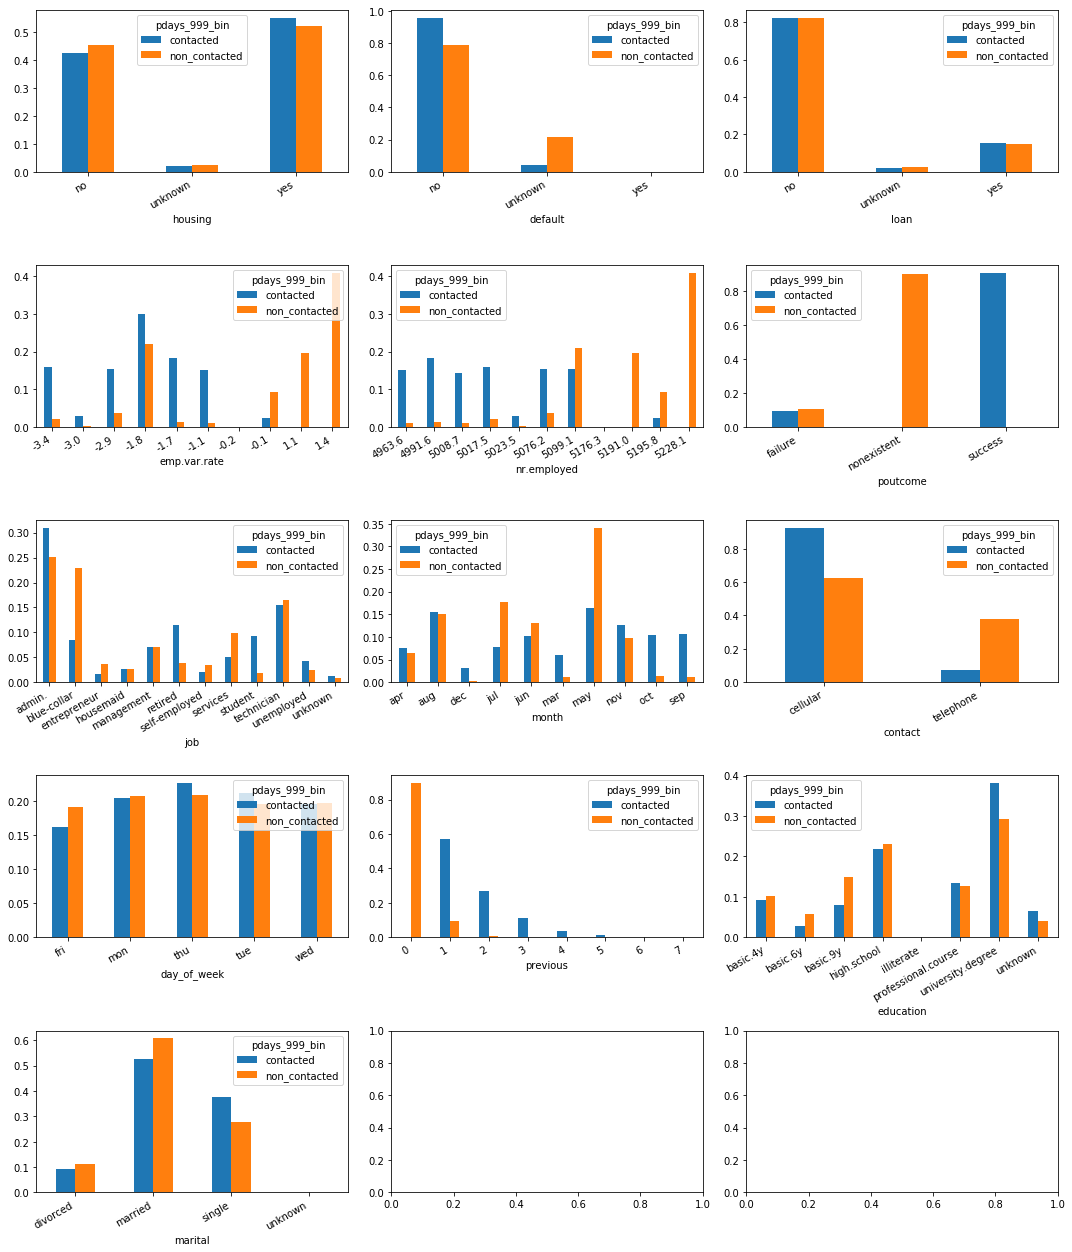

In [30]:
plotting.distplot_categorical(data, cols_cat, 'pdays_999_bin', normalize=True)

**Conclusion**

* We can see that non_contacted customer all have nonexistent value in `poutcome`, while contacted customer all have success value in `poutcome`, with equal likeliness in failure value. We need to explore further as what success and failure means.
* From month attribute we can see that the distribution between each month is not identical between contacted and non contacted client. We need to explore further as what differs between each month, (e.g seasonal holidays, etc.)
* This is odd, as we are supposed to see non_contacted only have 0 values in `previous` attributes. **We can consider removing those data**.
* The distribution `emp.var.rate` columns between non_contacted and contacted is similar, with non_contacted responding with 'no', and contacted responding with 'yes'

#### `age` attribute

##### Old vs Young Customers

In [31]:
print(data['age_old_bin'].value_counts(normalize=True))
print(data['age_old_bin'].value_counts())

age<60     0.971035
age>=60    0.028965
Name: age_old_bin, dtype: float64
age<60     39995
age>=60     1193
Name: age_old_bin, dtype: int64


We see that **97.10%** of our customers are more than 60 years old.

We want to see why old customer is more likely to respond `yes` compared to young customer, to analyze this, we can plot the difference distribution plot for each attributes.

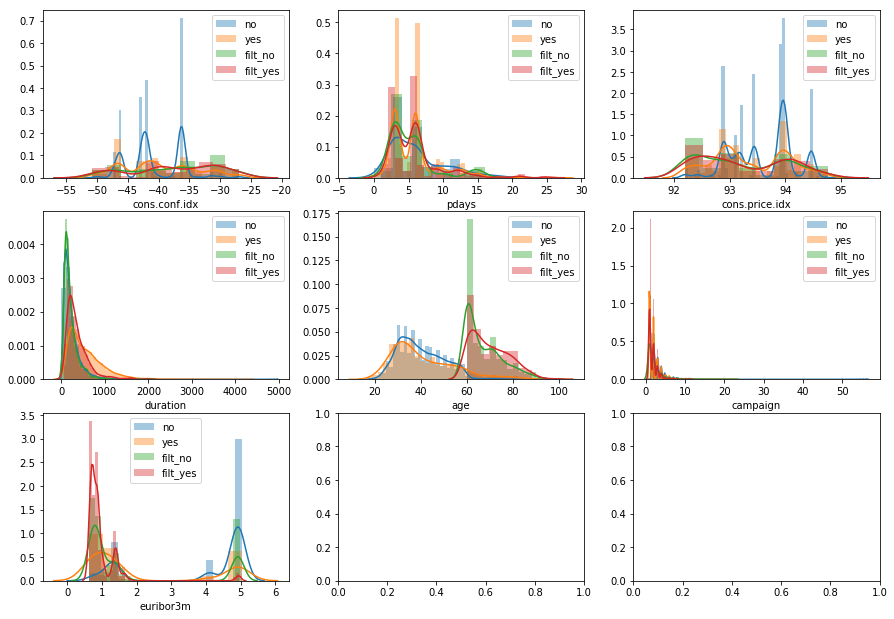

In [32]:
plotting.diff_distplot_numerical(data, cols_num, col_target, data['age_old_bin'] == 'age>=60')

**Conclusion**

* Since all of numerical attributes is not related to customer, except `age`, we can't conclude the differences from these attributes alone.

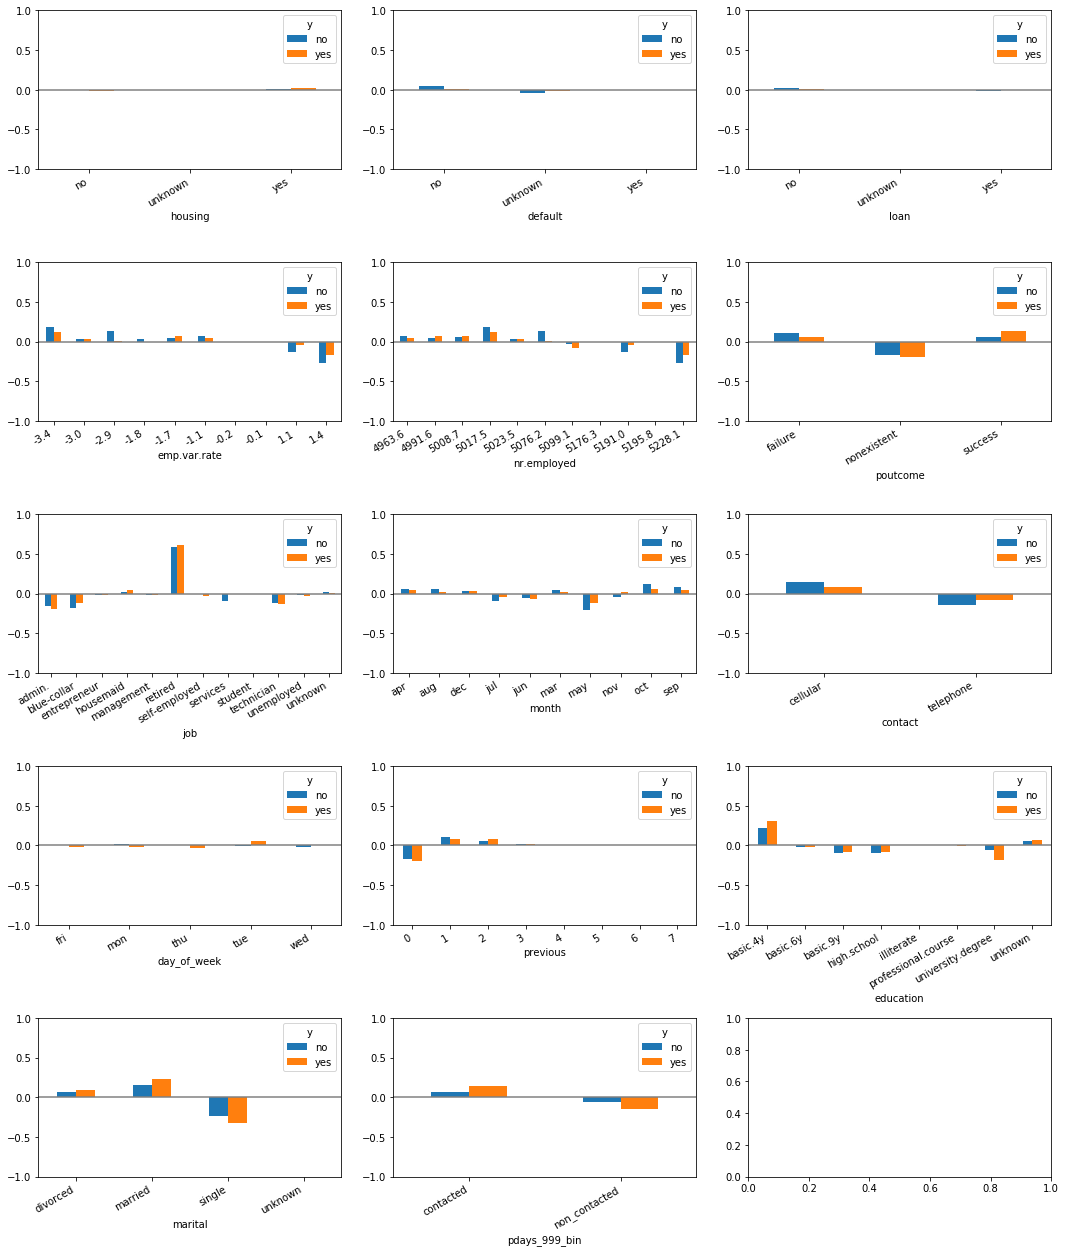

In [33]:
plotting.diff_distplot_categorical(data, cols_cat + ['pdays_999_bin'], col_target, data['age_old_bin'] == 'age>=60')

Here, a positive differences means there exist more distribution in the filtered dataframe compared to the actual population.

**Conclusion**
* A lot of old customer are 'retired' in their `job` attribute.
* More old customer which is contacted through cellular phone, compared to telephone in `contact` attribute. This make sense as old customer probably doesn't have telephone and only have cellular phone.
* More divorced/married customer in the filtered distribution, contrast to single in `marital` status compared to he population.

### Categorical Columns Further Analysis

#### `default` attribute

##### Default Customers vs Non-default Customers

In [34]:
print(data['default'].value_counts(normalize=True))
print(data['default'].value_counts(normalize=False))

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


Turns out only 3 customers whose value is 'yes' in `default` attribute. This is insignificant attribute, so we can safely remove `default` attribute.

# Data Preparation

List steps to be done in data preparation based on process in Data Understanding, done ordered by number.

1. Remove `default`, `duration` attribute
2. Remove data with 'unknown' value in: `loan`, `housing`, `marital`
3. Remove data with `pdays` attribute values equals to '999' but `previous` attribute values more than 0
4. Further binning of numerical columns:
    * `campaign` to `campaign_binned` of {1, 2, 3 >3}
    * `pdays` removed, use `pdays_999_binned` instead
    * `cons.price.idx` to `cons.price.idx_binned` of equal share binning
    * `cons.conf.idx` to `cons.conf.idx_binned` of quantile binning

In [35]:
data_clean = data.copy(deep=True)

In [36]:
# Attributes removal
data_clean = data_clean.drop(['default', 'duration'], axis=1)

# Missing values removal
loan_unknown = data_clean['loan'] == 'unknown'
housing_unknown = data_clean['housing'] == 'unknown'
marital_unknown = data_clean['marital'] == 'unknown'
data_clean = data_clean[~(loan_unknown | housing_unknown | marital_unknown)]

# Error values removal
error_previous = (data_clean['pdays_999_bin'] == 1) & (data_clean['previous'] != 0)
data_clean = data_clean[~error_previous]

# Binning
data_clean['campaign_binned'] = transformation.reduce_ordinal_category(data_clean['campaign'], [-np.inf, 1, 2, 3, np.inf], ['1', '2', '3', '>3'])
data_clean['cons.price.idx_binned'] = pd.cut(data_clean['cons.price.idx'], 3)
data_clean['cons.conf.idx_binned'] = pd.qcut(data_clean['cons.conf.idx'], 4)

data_clean = data_clean.drop(['pdays', 'campaign', 'cons.price.idx', 'cons.conf.idx'], axis=1)

In [37]:
print("Before cleaning: {}".format(data.shape))
print("After cleaning: {}".format(data_clean.shape))

Before cleaning: (41188, 23)
After cleaning: (40119, 20)


## Split Numerical & Categorical Data

In [38]:
transformation.convert_to_categorical(data_clean)

Column job casted to categorical
Column marital casted to categorical
Column education casted to categorical
Column housing casted to categorical
Column loan casted to categorical
Column contact casted to categorical
Column month casted to categorical
Column day_of_week casted to categorical
Column previous casted to categorical
Column poutcome casted to categorical
Column emp.var.rate casted to categorical
Column nr.employed casted to categorical
Column y casted to categorical
Column pdays_999_bin casted to categorical
Column age_old_bin casted to categorical
Column campaign_binned casted to categorical
Column cons.price.idx_binned casted to categorical
Column cons.conf.idx_binned casted to categorical


In [39]:
cols_num_clean = list(set(data_clean.select_dtypes(include=[np.number]).columns) - set([col_ID]))
cols_cat_clean = list(set(data_clean.select_dtypes(exclude=[np.number]).columns) - set([col_target]))

## Univariate Analysis

See distribution after data cleaning.

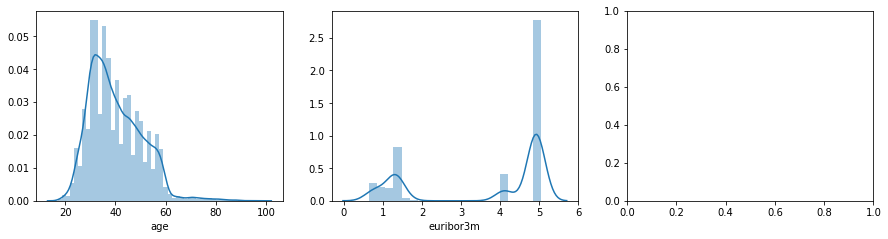

In [40]:
plotting.distplot_numerical(data_clean, cols_num_clean)

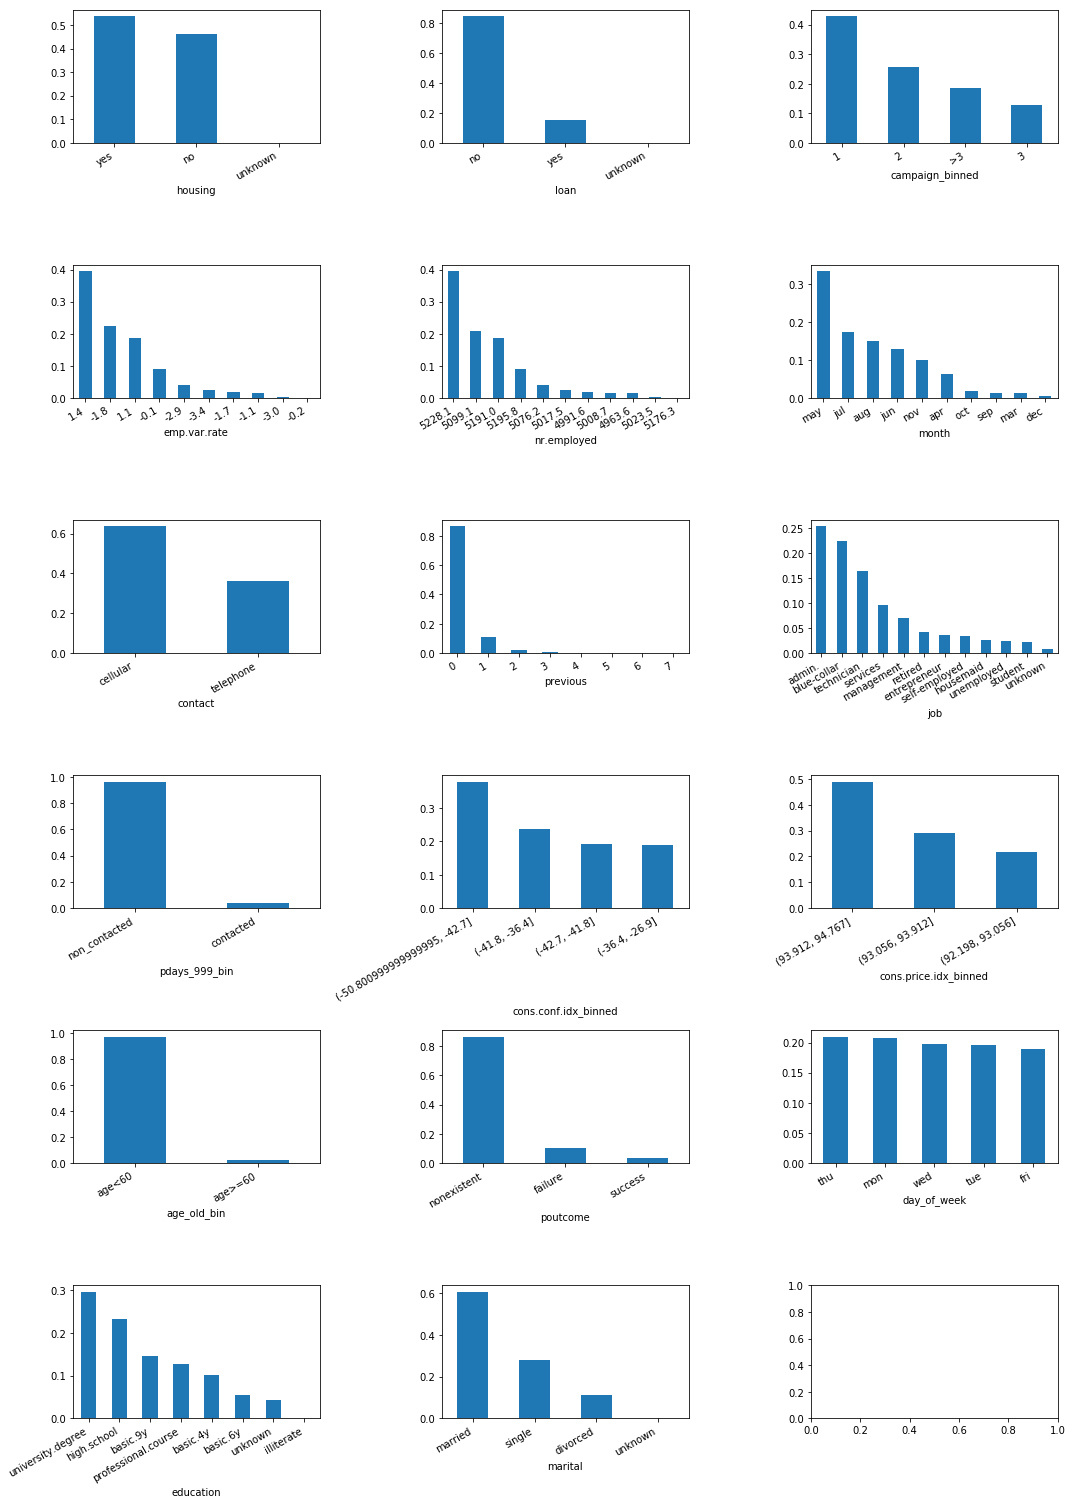

In [41]:
plotting.distplot_categorical(data_clean, cols_cat_clean)

## Bivariate (Attribute - Target) Analysis

See distribution after data cleaning.

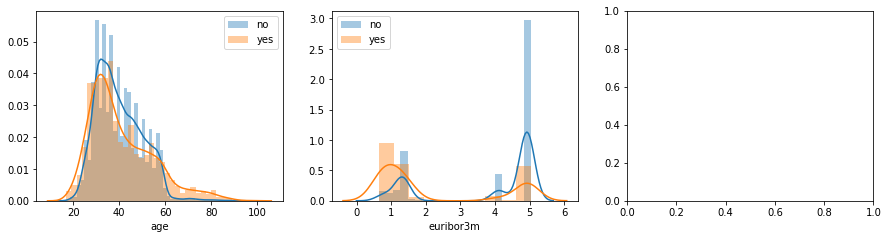

In [42]:
plotting.distplot_numerical(data_clean, cols_num_clean, col_target)

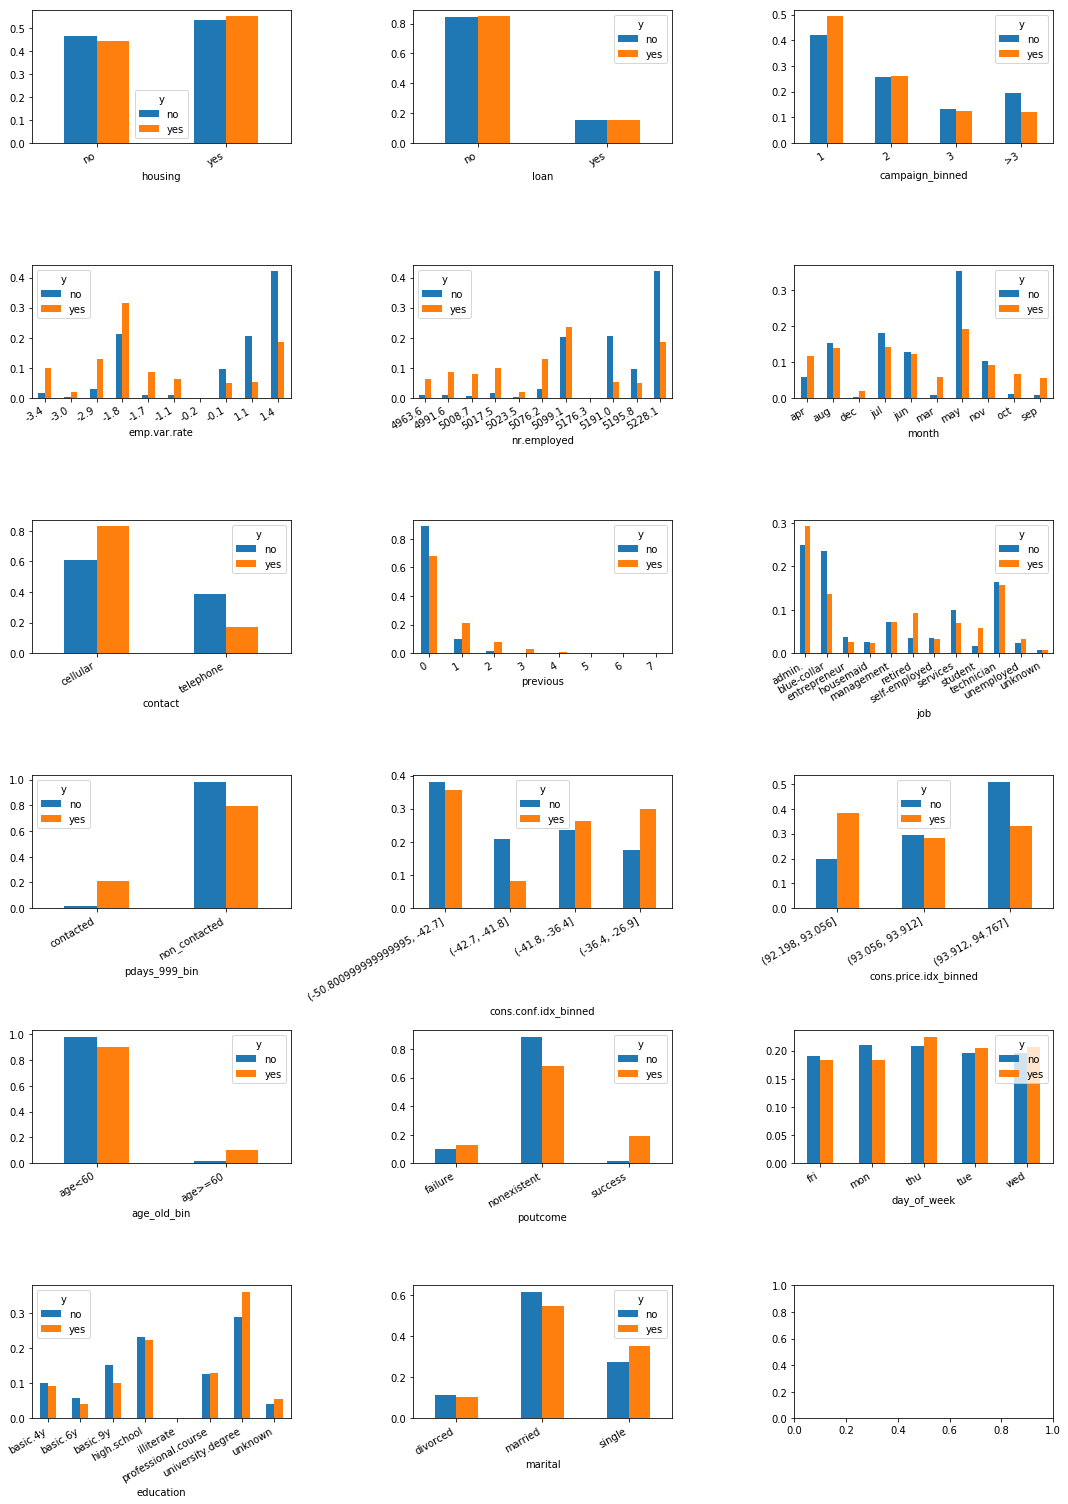

In [43]:
plotting.distplot_categorical(data_clean, cols_cat_clean, col_target)